# Classification

In [1]:
#imports
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import folium

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import math
import random
from datetime import timedelta

import warnings
warnings.filterwarnings('ignore')

#color pallete
cnf='#393e46'
dth='#ff2e63'
rec='#21bf73'
act='#fe9801'

#dataframes
df = pd.read_csv('/Users/javkhlan/Desktop/Projects/Data Visualization in Python/DB3/covid19_data_cleaned.csv', parse_dates=['Date'], index_col=0)
country_daywise = pd.read_csv('/Users/javkhlan/Desktop/Projects/Data Visualization in Python/DB3/country_daywise.csv', parse_dates=['Date'])
countrywise = pd.read_csv('/Users/javkhlan/Desktop/Projects/Data Visualization in Python/DB3/countrywise.csv',index_col=0)
daywise = pd.read_csv('/Users/javkhlan/Desktop/Projects/Data Visualization in Python/DB3/daywise.csv', parse_dates=['Date'])

In [2]:
# index_col = 0, to avoid Unnamed: 0 index column
# Or it can be avoided when df.to_csv(index=False)

In [3]:
countrywise.head()

,Country,Confirmed,Death,Recovered,Active,New cases,New death,New recovered,Death/100 Cases,Recovered/100 Cases,Death/100 Recovered,Population,Cases/Million People
0,Afghanistan,45966,1752,36709,7505,127,12,414,3.81,79.86,4.77,38928341,1181.0
1,Albania,36790,787,18152,17851,545,16,397,2.14,49.34,4.34,2877800,12784.0
2,Algeria,81212,2393,52568,26251,1044,21,622,2.95,64.73,4.55,43851043,1852.0
3,Andorra,6610,76,5710,824,0,0,0,1.15,86.38,1.33,77265,85550.0
4,Angola,15087,345,7763,6979,79,3,66,2.29,51.45,4.44,32866268,459.0


In [4]:
countrywise.drop(countrywise.iloc[:, 4:11], inplace = True, axis = 1)

In [5]:
countrywise.drop('Cases/Million People', inplace = True, axis = 1)

In [6]:
countrywise.head()

,Country,Confirmed,Death,Recovered,Population
0,Afghanistan,45966,1752,36709,38928341
1,Albania,36790,787,18152,2877800
2,Algeria,81212,2393,52568,43851043
3,Andorra,6610,76,5710,77265
4,Angola,15087,345,7763,32866268


### Linear Regression

#### Regression searches for relationship among variables

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
us = country_daywise[country_daywise.Country == 'US'].reset_index(drop=True)

In [9]:
us_c = np.array(us)[:, 2]
us_d = np.array(us)[:, 3]
us_r = np.array(us)[:, 4]

us_c = us_c.reshape(-1,1)
us_d = us_d.reshape(-1,1)
us_r = us_r.reshape(-1,1)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x = us_c
y = us_d

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
linearRegression = LinearRegression()
linearRegression.fit(x_train, y_train)
lr_predict = linearRegression.predict(x_test)

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
print('Mean Squared Error: %.2f'%mean_squared_error(y_test, lr_predict))
print('R-Square: %.2f'%r2_score(y_test, lr_predict))

Mean Squared Error: 769039999.59
R-Square: 0.89


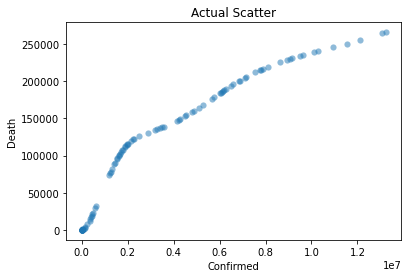

In [14]:
plt.scatter(x_test, y_test, linewidths=0.1, alpha=0.5)
plt.xlabel('Confirmed')
plt.ylabel('Death')
plt.title('Actual Scatter')
plt.show()

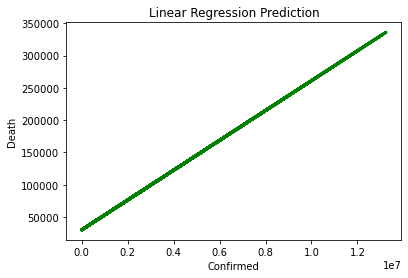

In [15]:
plt.plot(x_test, lr_predict, color='green', linewidth = 3)
plt.xlabel('Confirmed')
plt.ylabel('Death')
plt.title('Linear Regression Prediction')
plt.show()

In [16]:
from sklearn.metrics import accuracy_score

### Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
countrywise.head()

,Country,Confirmed,Death,Recovered,Population
0,Afghanistan,45966,1752,36709,38928341
1,Albania,36790,787,18152,2877800
2,Algeria,81212,2393,52568,43851043
3,Andorra,6610,76,5710,77265
4,Angola,15087,345,7763,32866268


In [19]:
#Incidence rate formula
countrywise['Incidence rate'] = (countrywise['Confirmed']/countrywise['Population']*10000).round(decimals=2)

In [20]:
#Incidence rate >3 : high risk
#Incidence rate >1.5 : moderate
#Incidence rate < 1.5 : low

risk = []
for i in countrywise['Incidence rate']:
    if(i < 1.5):
        risk.append(0)
    elif (i < 3):
        risk.append(1)
    else:
        risk.append(2)
        
countrywise['Risk'] = risk

In [21]:
countrywise[countrywise['Incidence rate']<3]

,Country,Confirmed,Death,Recovered,Population,Incidence rate,Risk
18,Benin,2974,43,2819,12123198,2.45,1
26,Burkina Faso,2816,68,2579,20903278,1.35,0
28,Burundi,681,1,575,11890781,0.57,0
30,Cambodia,315,0,301,16718971,0.19,0
34,Chad,1663,101,1504,16425859,1.01,0
36,China,92681,4743,86968,1439323776,0.64,0
39,Congo (Brazzaville),5774,94,4988,89561403,0.64,0
55,Eritrea,577,0,498,3546427,1.63,1
59,Fiji,38,2,33,896444,0.42,0
94,Laos,39,0,24,7275556,0.05,0


In [22]:
x = countrywise[['Confirmed', 'Population', 'Incidence rate']] #Features
y = countrywise['Risk'] #Label
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
randomForest = RandomForestClassifier().fit(x_train, y_train)
rf_predict = randomForest.predict(x_test)
accuracy_score(y_test, rf_predict)

1.0

In [23]:
x = countrywise[['Confirmed', 'Population']] #Features
y = countrywise['Risk'] #Label
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
randomForest = RandomForestClassifier().fit(x_train, y_train)
rf_predict = randomForest.predict(x_test)
accuracy_score(y_test, rf_predict)

1.0

In [24]:
randomForest.predict([[100, 1000000]])

array([2])

In [25]:
#what if take other values???
x = countrywise[['Confirmed', 'Death', 'Recovered']] #Features
y = countrywise['Risk'] #Label
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
randomForest = RandomForestClassifier().fit(x_train, y_train)
rf_predict = randomForest.predict(x_test)
accuracy_score(y_test, rf_predict)

0.7894736842105263

## Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
x = countrywise[['Confirmed', 'Population', 'Incidence rate']] #Features
y = countrywise['Risk'] #Label

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
decisionTree = DecisionTreeClassifier().fit(x_train, y_train)
dt_predict = decisionTree.predict(x_test)
accuracy_score(y_test, dt_predict)

1.0

In [28]:
x = countrywise[['Confirmed', 'Population']] #Features
y = countrywise['Risk'] #Label

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
decisionTree = DecisionTreeClassifier().fit(x_train, y_train)
dt_predict = decisionTree.predict(x_test)
accuracy_score(y_test, dt_predict)

0.9473684210526315

In [29]:
x = countrywise[['Confirmed', 'Death', 'Recovered']] #Features
y = countrywise['Risk'] #Label

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
decisionTree = DecisionTreeClassifier().fit(x_train, y_train)
dt_predict = decisionTree.predict(x_test)
accuracy_score(y_test, dt_predict)

0.8771929824561403

## KNN

#### Why KNN is far from accurate???

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
x = countrywise[['Incidence rate']] #Features
y = countrywise['Risk'] #Label

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
knn = KNeighborsClassifier(n_neighbors=20).fit(x_train, y_train)
knn_predict = knn.predict(x_test)
accuracy_score(y_test, knn_predict)

0.9473684210526315

In [32]:
x = countrywise[['Confirmed', 'Population']] #Features
y = countrywise['Risk'] #Label

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
knn = KNeighborsClassifier(n_neighbors=20).fit(x_train, y_train)
knn_predict = knn.predict(x_test)
accuracy_score(y_test, knn_predict)

0.9122807017543859

In [33]:
x = countrywise[['Confirmed', 'Death', 'Recovered']] #Features
y = countrywise['Risk'] #Label

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
knn = KNeighborsClassifier(n_neighbors=20).fit(x_train, y_train)
knn_predict = knn.predict(x_test)
accuracy_score(y_test, knn_predict)

0.7894736842105263

## K-Mean

In [34]:
from sklearn.cluster import KMeans

#### Try 2

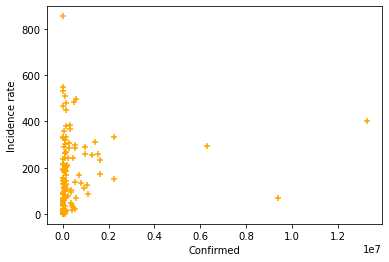

In [35]:
plt.xlabel('Confirmed')
plt.ylabel('Incidence rate')
plt.scatter(countrywise.Confirmed, countrywise['Incidence rate'], marker='+', color='orange')
plt.show()

In [36]:
km = KMeans(n_clusters = 3)
km

KMeans(n_clusters=3)

In [37]:
y_pred = km.fit_predict(countrywise[['Confirmed', 'Incidence rate']])
y_pred

array([0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [38]:
countrywise['km_cluster'] = y_pred
countrywise.head(3)

,Country,Confirmed,Death,Recovered,Population,Incidence rate,Risk,km_cluster
0,Afghanistan,45966,1752,36709,38928341,11.81,2,0
1,Albania,36790,787,18152,2877800,127.84,2,0
2,Algeria,81212,2393,52568,43851043,18.52,2,0


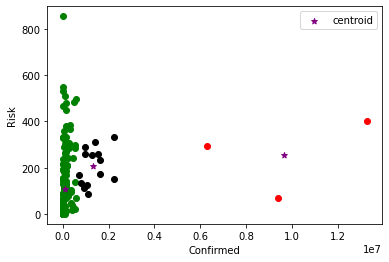

In [39]:
km0 = countrywise[countrywise.km_cluster==0]
km1 = countrywise[countrywise.km_cluster==1]
km2 = countrywise[countrywise.km_cluster==2]
plt.scatter(km0.Confirmed, km0['Incidence rate'], color='green')
plt.scatter(km1.Confirmed, km1['Incidence rate'], color='red')
plt.scatter(km2.Confirmed, km2['Incidence rate'], color='black')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple', 
            marker='*', label='centroid')
plt.xlabel('Confirmed')
plt.ylabel('Risk')
plt.legend()
plt.show()

#### Try 1

In [40]:
x = countrywise[['Confirmed', 'Population', 'Incidence rate']] #Features
y = countrywise['Risk'] #Label

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
kmeans = KMeans().fit(x_train, y_train)
kmeans_predict = kmeans.predict(x_test)
accuracy_score(y_test, kmeans_predict)

0.05263157894736842

In [41]:
x = countrywise[['Confirmed', 'Death', 'Recovered']] #Features
y = countrywise['Risk'] #Label

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
kmeans = KMeans().fit(x_train, y_train)
kmeans_predict = kmeans.predict(x_test)
accuracy_score(y_test, kmeans_predict)

0.12280701754385964

# SVM

In [42]:
from sklearn.svm import SVC

In [43]:
x = countrywise[['Confirmed', 'Population', 'Incidence rate']] #Features
y = countrywise['Risk'] #Label

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
svm = SVC().fit(x_train, y_train)
svm_predict = svm.predict(x_test)
accuracy_score(y_test, svm_predict)

0.7719298245614035

In [44]:
# 0 - low, 1 - mid, 2 - high
low = countrywise[countrywise.Risk == 0]
mid = countrywise[countrywise.Risk == 1]
high = countrywise[countrywise.Risk == 2]

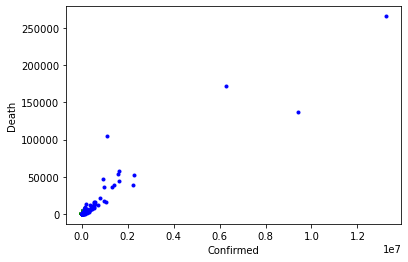

In [45]:
plt.xlabel('Confirmed')
plt.ylabel('Death')
plt.scatter(low['Confirmed'], low['Death'], color='green', marker='+')
plt.scatter(high['Confirmed'], high['Death'], color='blue', marker='.')
plt.show()

#### This will explain why KNN and SVM bad at predicting due to no clusters

In [46]:
x = countrywise[['Confirmed', 'Population', 'Incidence rate']] #Features
y = countrywise['Risk'] #Label

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [48]:
svm = SVC().fit(x_train, y_train)
svm_predict = svm.predict(x_test)
accuracy_score(y_test, svm_predict)

0.8596491228070176

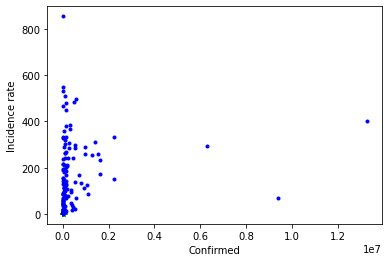

In [49]:
plt.xlabel('Confirmed')
plt.ylabel('Incidence rate')
plt.scatter(low['Confirmed'], low['Incidence rate'], color='green', marker='+')
plt.scatter(high['Confirmed'], high['Incidence rate'], color='blue', marker='.')
plt.show()

# Logistic Regression

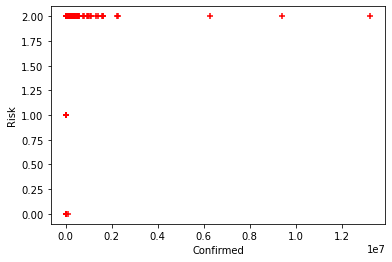

In [50]:
plt.xlabel('Confirmed')
plt.ylabel('Risk')
plt.scatter(countrywise.Confirmed, countrywise.Risk, marker='+', color='red')
plt.show()

In [51]:
x_train, x_test, y_train, y_test = train_test_split(countrywise, countrywise['Risk'], test_size = 0.3)

In [52]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(x_train[['Confirmed']], x_train['Risk'])
lr_predict = lr.predict(x_test[['Confirmed']])
accuracy_score(y_test, lr_predict)

0.8245614035087719

# Lin Reg

In [53]:
countrywise.head()

,Country,Confirmed,Death,Recovered,Population,Incidence rate,Risk,km_cluster
0,Afghanistan,45966,1752,36709,38928341,11.81,2,0
1,Albania,36790,787,18152,2877800,127.84,2,0
2,Algeria,81212,2393,52568,43851043,18.52,2,0
3,Andorra,6610,76,5710,77265,855.50,2,0
4,Angola,15087,345,7763,32866268,4.59,2,0


In [54]:
x = np.array(countrywise)[:, 2]
y = np.array(countrywise)[:, 6]

x = x.reshape(-1,1)
y = y.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
linearRegression = LinearRegression().fit(x_train, y_train)
lr_predict = linearRegression.predict(x_test)
print('Mean Squared Error: %.2f'%mean_squared_error(y_test, lr_predict))
print('R-Square: %.2f'%r2_score(y_test, lr_predict))

Mean Squared Error: 0.48
R-Square: -0.69
